# EEG Test Data

In [ ]:
import IPython
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/yj52xrfgtz-1.zip
!unzip /content/yj52xrfgtz-1.zip -d /content/gdf_data/
!pip install mne
!git clone https://github.com/OpenNeuroDatasets/ds000208.git
!pip install pydicom
!pip install nibabel
!pip install pyvistaqt ipywidgets
!pip install pyxdf
!pip install ipyvtklink
IPython.display.clear_output()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
!sudo apt update
!sudo apt-get install libgl1-mesa-dev xvfb
!sudo apt install -yqq libxkbcommon-x11-0 libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-randr0 libxcb-render-util0 libxcb-xinerama0 libxcb-xfixes0 libopengl0
IPython.display.clear_output()

In [ ]:
!/sbin/start-stop-daemon --start --quiet --background --exec /usr/bin/Xvfb -- :99 -screen 0 800x600x24 -ac +extension GLX +render -noreset

import os
os.environ['DISPLAY'] = ':99'

/sbin/start-stop-daemon: unable to stat /usr/bin/Xvfb (No such file or directory)


파일 맨 윗줄 띄워주면 24개 위치 알아서 찾음

수정해줘야함

In [ ]:
#@markdown  gdf_data/mBrain 22ch- Referenced channels.txt 파일수정
%%writefile "gdf_data/mBrain 22ch- Referenced channels.txt"

FP1	-90	-72
FP2	90	72
F3	-60	-51
F4	60	51
C3	-45	0
C4	45	0
P3	-60	51
P4	60	-51
O1	-90	72
O2	90	-72
F7	-90	-36
F8	90	36
T7	-90	0
T8	90	0
P7	-90	36
P8	90	-36
Fz	45	90
Cz	0	0
Pz	45	-90
AFz	67	90
CPz	22	-90
POz	67	-90


Overwriting gdf_data/mBrain 22ch- Referenced channels.txt


In [ ]:
#@markdown gdf_data/mBrain_24ch_locations.txt 파일수정
%%writefile gdf_data/mBrain_24ch_locations.txt

FP1	-90	-72
FP2	90	72
F3	-60	-51
F4	60	51
C3	-45	0
C4	45	0
P3	-60	51
P4	60	-51
O1	-90	72
O2	90	-72
F7	-90	-36
F8	90	36
T7	-90	0
T8	90	0
P7	-90	36
P8	90	-36
Fz	45	90
Cz	0	0
Pz	45	-90
M1	-120	25
M2	120	-25
AFz	67	90
CPz	22	-90
POz	67	-90


Overwriting gdf_data/mBrain_24ch_locations.txt


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.minimum_norm import read_inverse_operator, compute_source_psd

In [ ]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder,
                                    'MEG',
                                    'sample',
                                    'sample_audvis_raw.fif')
sample_data_inverse_file = os.path.join(sample_data_folder,
                                        "MEG",
                                        "sample",
                                        'sample_audvis-meg-oct-6-meg-inv.fif')
sample_data_label = os.path.join(sample_data_folder,
                                 "MEG",
                                 "sample",
                                 "labels",
                                 'Aud-lh.label')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)#.crop(tmax=60)
inverse_operator = read_inverse_operator(sample_data_inverse_file, verbose=False)
raw_labels = mne.read_label(sample_data_label)
# use just 60 seconds of data and mag channels, to save memory
# raw.crop(0, 60).pick_types(meg='mag', stim=True).load_data()

In [ ]:
raw.to_data_frame().describe()

time       MEG 0113       MEG 0112       MEG 0111  \
count  166800.000000  166800.000000  166800.000000  166800.000000   
mean      138.856841      -1.285692      -2.208016     -80.003913   
std        80.169755      74.670290      65.034479     586.997691   
min         0.000000    -819.702159    -511.108405   -3006.958115   
25%        69.428420     -38.574219     -28.930664    -404.296889   
50%       138.856841      -9.643555      -9.643555     -37.902833   
75%       208.285261      28.930664      19.287110     252.685556   
max       277.713681     520.751960     501.464850    4510.437173   

            MEG 0122       MEG 0123       MEG 0121       MEG 0132  \
count  166800.000000  166800.000000  166800.000000  166800.000000   
mean       -7.015802       5.992244    -102.806891      -4.883466   
std        83.091392      82.144603     672.114264      70.717469   
min      -520.751960    -597.900398   -3512.329227    -376.098638   
25%       -48.217774     -28.930664    -454.834001     -38.574219   
50%         0.000000      -0.000000     -37.902833      -9.643555   
75%        28.930664      38.574219     303.222667      28.930664   
max       597.900398     646.118172    4093.506006     530.395514   

            MEG 0133       MEG 0131  ...        EEG 052        EEG 053  \
count  166800.000000  166800.000000  ...  166800.000000  166800.000000   
mean        4.300690     -57.952629  ...      40.097622      41.780379   
std        75.514165     516.399486  ...      17.360316       7.521728   
min      -511.108405   -2514.221281  ...    -107.521730      -2.245605   
25%       -28.930664    -366.394056  ...      31.299134      38.736694   
50%        -0.000000     -25.268556  ...      39.400086      42.354614   
75%        38.574219     265.319834  ...      47.930634      46.159668   
max       520.751960    4889.465507  ...     157.416232      61.005615   

             EEG 054        EEG 055        EEG 056        EEG 057  \
count  166800.000000  166800.000000  166800.000000  166800.000000   
mean       51.416371      64.774266      35.605401      58.453404   
std        18.966395      19.394063      17.833371      18.903467   
min      -102.431211     -91.399904    -111.928042     -91.454953   
25%        41.472716      54.591798      26.178162      48.403929   
50%        50.663024      63.926759      34.765076      57.458311   
75%        60.667662      73.675295      43.888673      67.537718   
max       169.671688     189.771489     153.908511     176.987544   

             EEG 058        EEG 059        EEG 060        EOG 061  
count  166800.000000  166800.000000  166800.000000  166800.000000  
mean       80.706821      48.979529      74.246200     272.392018  
std        18.470933      18.957533      16.618585      55.318381  
min       -67.910766     -98.451080     -52.273683    -231.405031  
25%        70.878295      38.915405      64.845094     266.704103  
50%        79.723815      48.399505      73.206544     277.816774  
75%        89.482421      58.434295      82.328127     289.583132  
max       197.683103     171.325683     183.016361     745.856327  

[8 rows x 377 columns]

    Using multitaper spectrum estimation with 7 DPSS windows


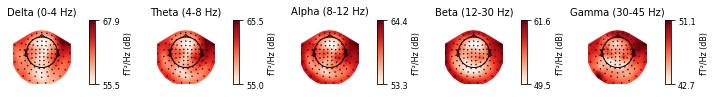

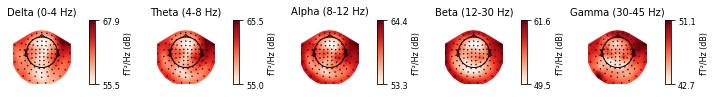

In [ ]:
with mne.use_log_level('WARNING'):  # hide some irrelevant info messages
    events = mne.find_events(raw, stim_channel='STI 014')
    event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
                  'visual/right': 4}
    epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_dict,
                        preload=True)
epo_spectrum = epochs.plot_psd_topomap()
# psds, freqs = epo_spectrum.get_data(return_freqs=True)
# print(f'\nPSDs shape: {psds.shape}, freqs shape: {freqs.shape}')
epo_spectrum

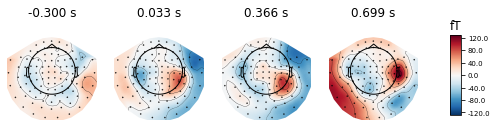

TypeError: ignored

In [ ]:
evoked = epochs['auditory'].average()
evk_spectrum = evoked.plot_topomap()
# the first 3 frequency bins for the first 4 channels:
print(evk_spectrum[:4, :3])

In [ ]:
stc_psd, sensor_psd = compute_source_psd(
                         raw, 
                         inverse_operator, 
                         lambda2=1./(3.**2.), 
                         method="dSPM",
                         tmin=0,
                         tmax=305, 
                         fmin=4,
                         fmax=100,
                         pick_ori="normal", 
                         n_fft=2048, 
                         label=raw_labels,
                         n_jobs=-1,
                         return_sensor=True,
                         adaptive=True,
                        #  pca=False,
                         dB=True,
                         verbose=True)

Not setting metadata
162 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Considering frequencies 4 ... 100 Hz
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 305 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Reducing data rank 33 -> 33
Using hann windowing on at most 162 epochs


  0%|          |  : 0/162 [00:00<?,       ?it/s]

In [ ]:
topo_norm.shape

(305, 1)

In [ ]:
data.shape

(33, 1)

In [ ]:
100 * data / topo_norm[:33,:]

In [ ]:
freq_bands = dict(alpha=(8, 12), beta=(15, 29))
topos = dict(vv=dict(), opm=dict())
stcs = dict(vv=dict(), opm=dict())
topo_norm = sensor_psd.data.sum(axis=1, keepdims=True)
stc_norm = stc_psd.sum()
kinds = ('vv', 'opm')
for kind in kinds:
    for band, limits in freq_bands.items():
        data = stc_psd.copy().crop(*limits).data.sum(axis=1, keepdims=True)
        topos[kind][band] = mne.EvokedArray(100 * data / topo_norm[:33,:],
                                            sensor_psd.info)
        stcs[kind][band] = 100 * stc_psd.copy().crop(*limits).sum() / stc_norm.data

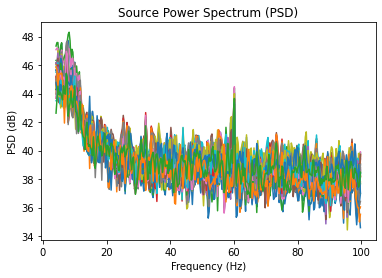

In [ ]:
plt.plot(stc.times, stc.data.T)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('Source Power Spectrum (PSD)')
plt.show()

In [ ]:
raw.to_data_frame().describe()

time             0             1             2
count  2.320128e+06  2.320128e+06  2.320128e+06  2.320128e+06
mean   1.160063e+02  4.895781e-01  2.071473e-01 -9.910690e-01
std    6.697634e+01  1.607723e+01  1.531327e+01  2.414383e-01
min    0.000000e+00 -1.378047e+02 -1.442564e+02 -1.000000e+00
25%    5.800317e+01 -9.323242e+00 -9.184082e+00 -1.000000e+00
50%    1.160063e+02  8.369141e-01  4.111328e-01 -1.000000e+00
75%    1.740095e+02  1.065771e+01  9.792480e+00 -1.000000e+00
max    2.320127e+02  1.585259e+02  6.831836e+01  8.000000e+00

In [ ]:
import os
import numpy as np
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
print(raw)
print(raw.info)

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, 

Effective window size : 13.639 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


Effective window size : 13.639 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Effective window size : 13.639 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


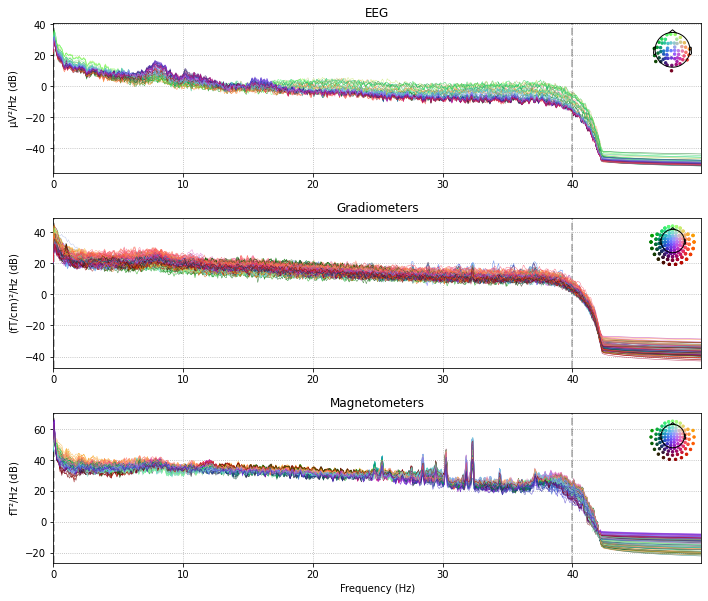

Using matplotlib as 2D backend.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


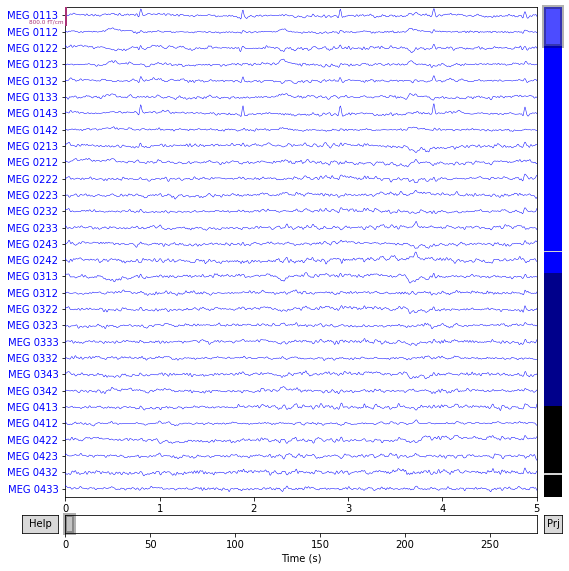

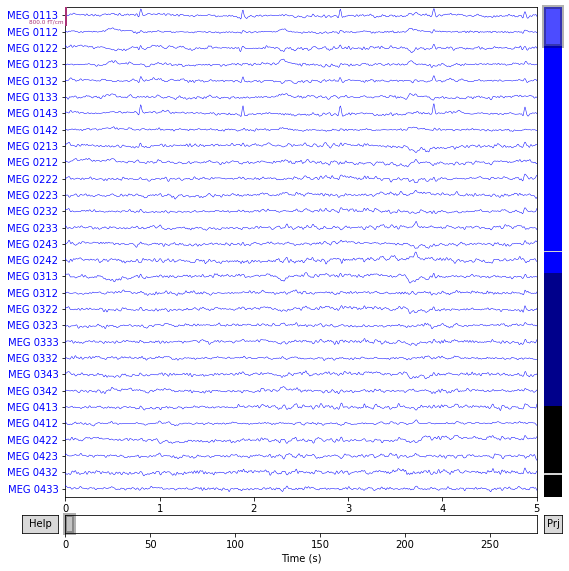

In [ ]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 10.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


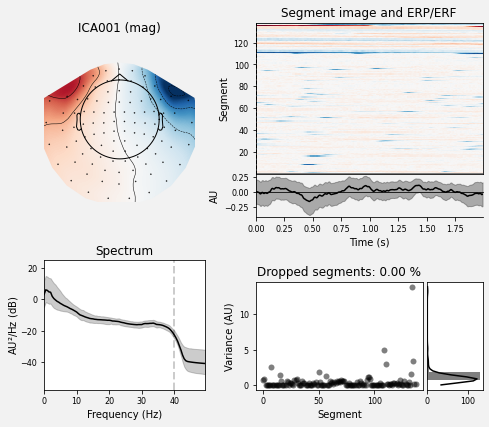

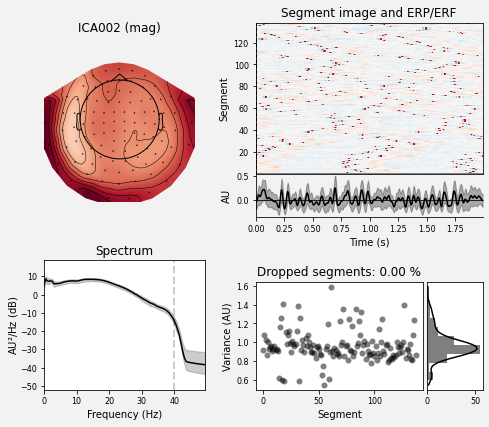

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)


Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


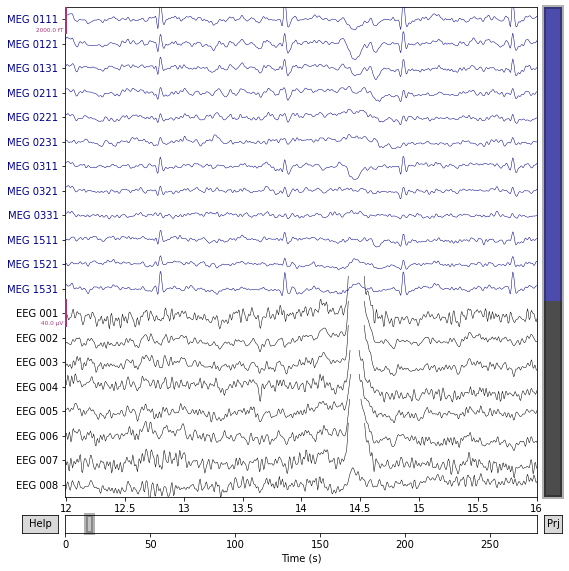

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


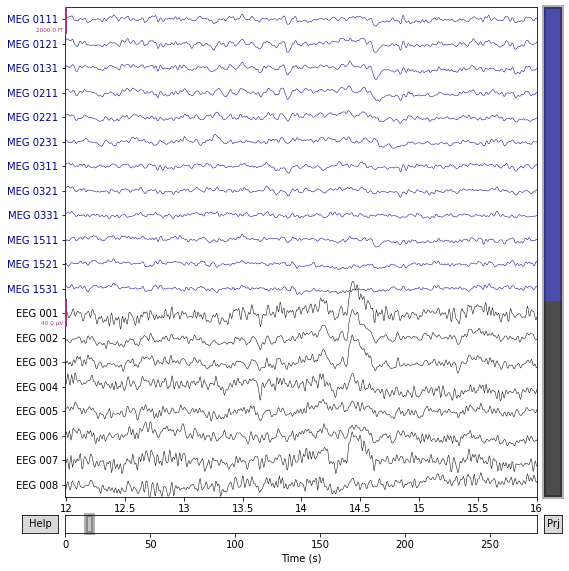

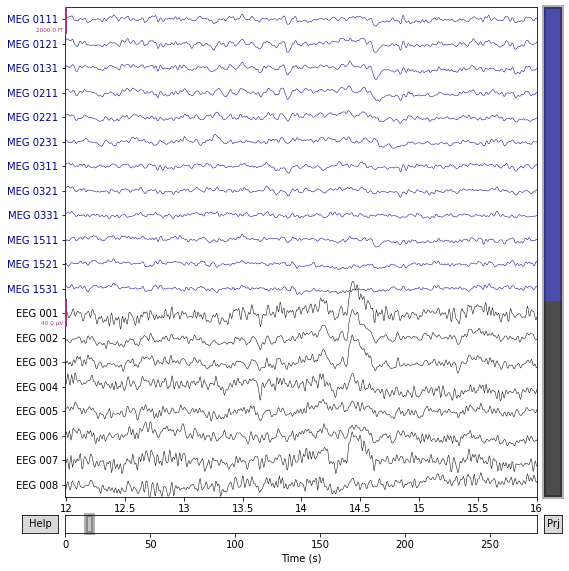

In [ ]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)


In [ ]:
events = mne.find_events(raw, stim_channel='STI 014')
print(events[:5])  # show the first 5


319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


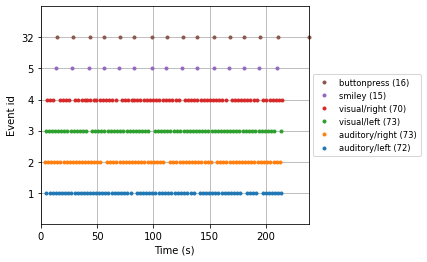

In [ ]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)


In [ ]:
reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)


Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Using data from preloaded Raw for 319 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
10 bad epochs dropped


In [ ]:
conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']
del raw, epochs  # free up memory


Dropped 7 epochs: 121, 195, 258, 271, 273, 274, 275


Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated


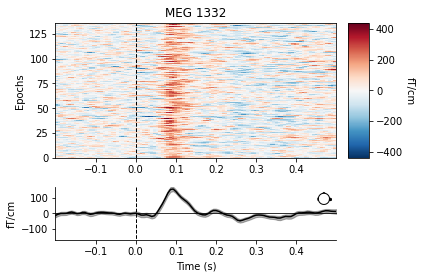

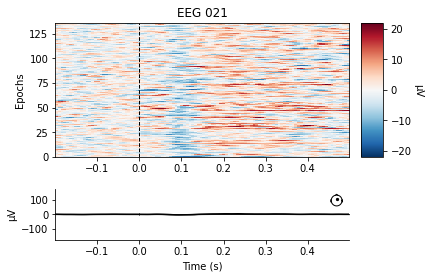

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [ ]:
aud_epochs.plot_image(picks=['MEG 1332', 'EEG 021'])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
No baseline correction applied


[Parallel(n_jobs=1)]: Done 364 out of 364 | elapsed:   11.3s finished


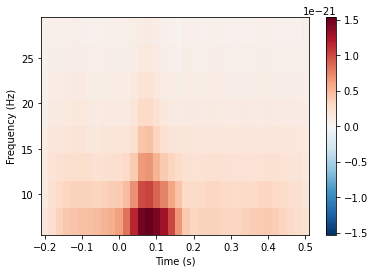

[<Figure size 432x288 with 2 Axes>]

In [ ]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(aud_epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['MEG 1332'])


Multiple channel types selected, returning one figure per type.
combining channels using "gfp"
combining channels using "gfp"


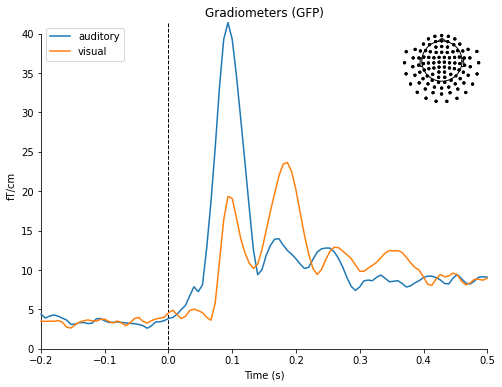

combining channels using "gfp"
combining channels using "gfp"


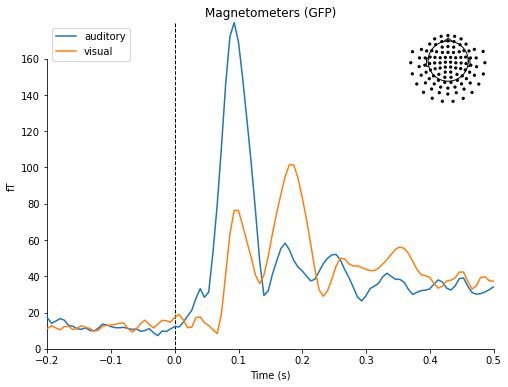

combining channels using "gfp"
combining channels using "gfp"


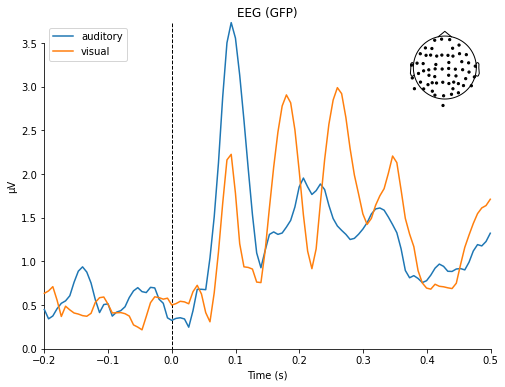

[<Figure size 576x432 with 2 Axes>,
 <Figure size 576x432 with 2 Axes>,
 <Figure size 576x432 with 2 Axes>]

In [ ]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right')


Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


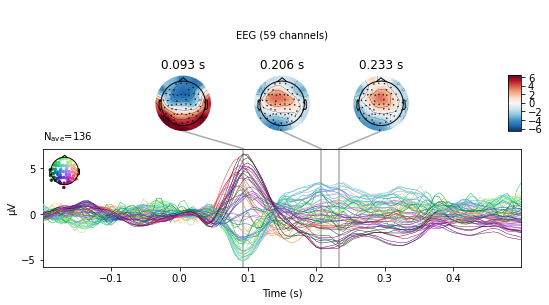

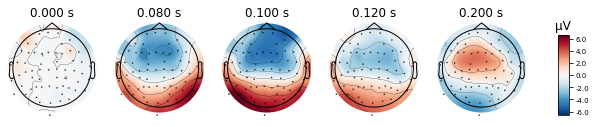

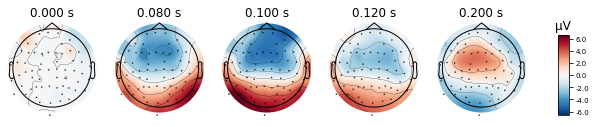

In [ ]:
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')


Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


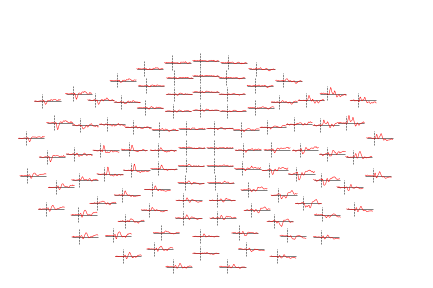

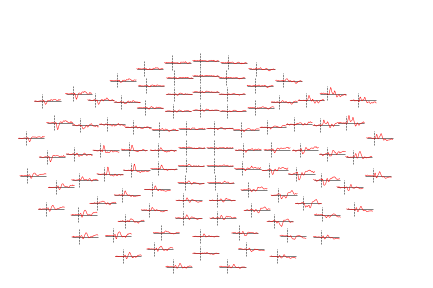

In [ ]:
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1, -1])
evoked_diff.pick_types(meg='mag').plot_topo(color='r', legend=False)


In [ ]:
# load inverse operator
inverse_operator_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                     'sample_audvis-meg-oct-6-meg-inv.fif')
inv_operator = mne.minimum_norm.read_inverse_operator(inverse_operator_file)
# set signal-to-noise ratio (SNR) to compute regularization parameter (λ²)
snr = 3.
lambda2 = 1. / snr ** 2
# generate the source time course (STC)
stc = mne.minimum_norm.apply_inverse(vis_evoked, inv_operator,
                                     lambda2=lambda2,
                                     method='MNE')  # or dSPM, sLORETA, eLORETA


Reading inverse operator decomposition from /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch sta

In [ ]:
# path to subjects' MRI files
subjects_dir = os.path.join(sample_data_folder, 'subjects')
# plot the STC
stc.plot(initial_time=0.1, hemi='split', views=['lat', 'med'],
         subjects_dir=subjects_dir)


Using notebook 3d backend.

Using control points [8.61922423e-11 1.06837855e-10 4.49139511e-10]


In [ ]:
import pyxdf

import mne
from mne.datasets import misc

fname = (misc.data_path() / 'xdf' / 'sub-P001_ses-S004_task-Default_run-001_eeg_a2.xdf')
streams, header = pyxdf.load_xdf(fname)

Using default location ~/mne_data for misc...
Creating ~/mne_data
Dataset misc version 0.0 out of date, latest version is 0.23


0.00B [00:00, ?B/s]
Untarring contents of '/root/mne_data/mne-misc-data-0.23.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json


[[-2.0109375e-05 -1.9673827e-05 -2.1584961e-05 ...  4.9467772e-06
   5.7456054e-06  6.4594728e-06]
 [ 6.2983399e-06  5.5322266e-06  4.6650389e-06 ...  9.6093754e-07
   1.8549805e-06  1.8251953e-06]
 [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 ... -1.0000000e+00
  -1.0000000e+00 -1.0000000e+00]]
Creating RawArray with float64 data, n_channels=3, n_times=2320128
    Range : 0 ... 2320127 =      0.000 ...   232.013 secs
Ready.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


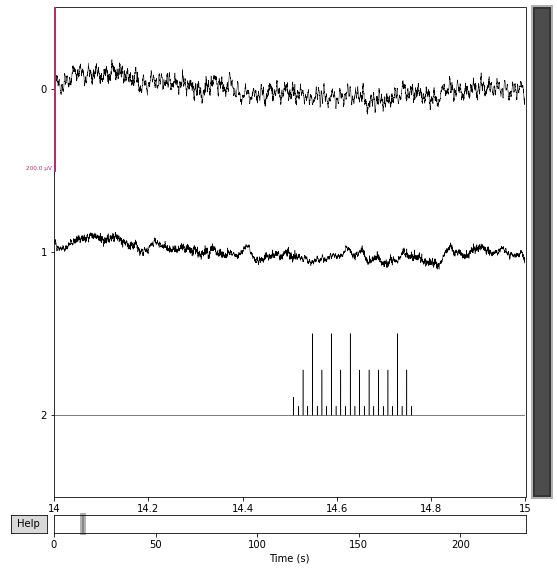

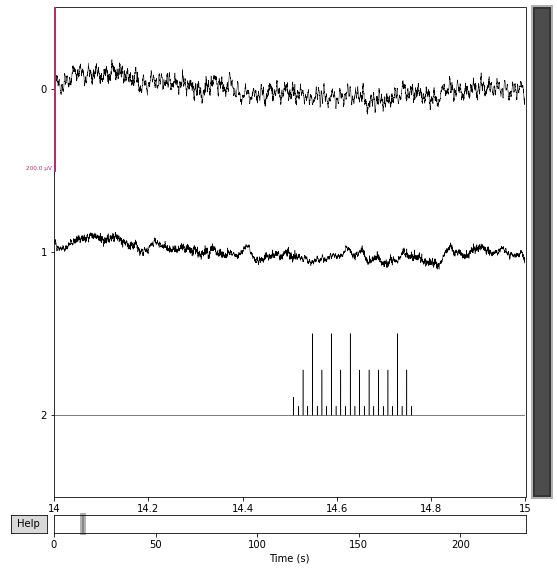

In [ ]:
streams, header = pyxdf.load_xdf(fname)
data = streams[0]["time_series"].T
assert data.shape[0] == 5  # four raw EEG plus one stim channel
data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
data = data[::2]  # subselect
data[:2] *= (1e-6 / 50 / 2)  # uV -> V and preamp gain
print(data)
# streams[0]["info"]["nominal_srate"] = ["250.000000"]
sfreq = float(streams[0]["info"]["nominal_srate"][0])
info = mne.create_info(3, sfreq, ["eeg", "eeg", "stim"])
raw = mne.io.RawArray(data, info)
raw.plot(scalings=dict(eeg=100e-6), duration=1, start=14)

In [ ]:
#@title Neuronicle
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.minimum_norm import read_inverse_operator, compute_source_psd

read_eeg = pd.read_excel("/content/2ch_EEG.xlsx",
                         sheet_name="Sheet5")
read_eeg["time"] = read_eeg.index
read_eeg["time"] = read_eeg["time"]*4/1000
read_eeg.describe()

EEG1          EEG2           PPG         sdPPG         pulse  \
count  34421.000000  34421.000000  34421.000000  34421.000000  34421.000000   
mean      27.851991     -8.617624  16143.140118  16406.720055      0.006130   
std      122.861775    134.642353   2488.473940   2496.600324      0.078055   
min     -590.840000   -590.840000      1.000000      0.000000      0.000000   
25%       -9.773000    -57.843000  15049.000000  15257.000000      0.000000   
50%       32.672000     11.720000  16280.000000  16181.000000      0.000000   
75%       68.085000     52.434000  17349.000000  17335.000000      0.000000   
max      590.804000    590.804000  32768.000000  32767.000000      1.000000   

       peak_interval(msec)          time  
count         34421.000000  34421.000000  
mean            653.807269     68.840000  
std             189.797285     39.746525  
min             316.000000      0.000000  
25%             604.000000     34.420000  
50%             688.000000     68.840000  
75%             744.000000    103.260000  
max            1344.000000    137.680000

Creating RawArray with float64 data, n_channels=3, n_times=34421
    Range : 0 ... 34420 =      0.000 ...   137.680 secs
Ready.
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


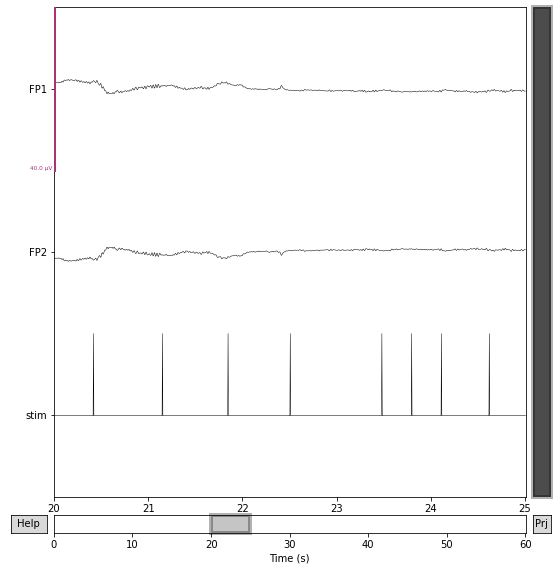

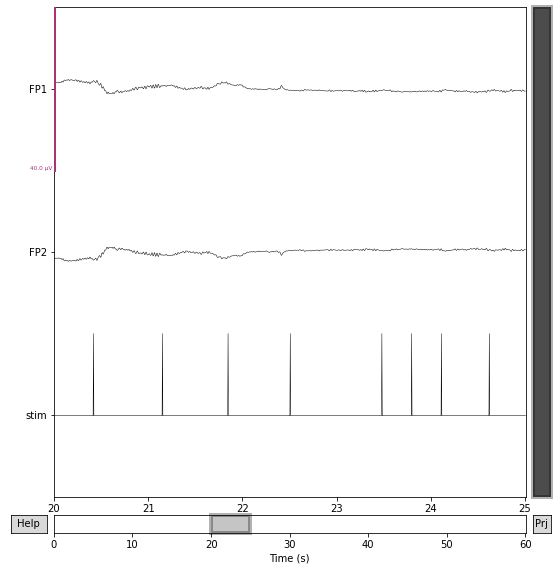

In [ ]:
test_eeg = read_eeg[["EEG1", "EEG2", "pulse"]].values.T
test_eeg[:2] *= (1e-6 / 50 / 2)  # uV -> V and preamp gain
test_eeg
info = mne.create_info(ch_names=["FP1", "FP2", "stim"],
                       sfreq=250.,
                       ch_types=["eeg","eeg","stim"])
raw = mne.io.RawArray(test_eeg, info).crop(tmax=60).load_data()
raw.set_eeg_reference(ref_channels="average",
                      projection=True)
raw.plot(scalings=dict(eeg=200e-7), 
         duration=5, 
         start=20)

Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-295-310e1b3b8f55>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=60)


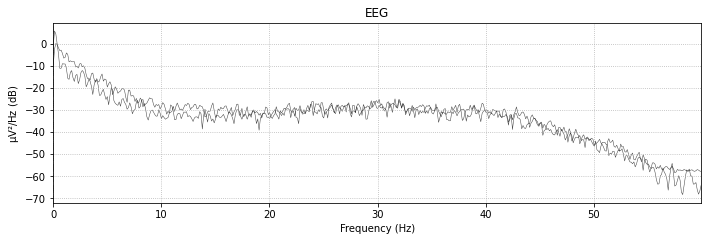

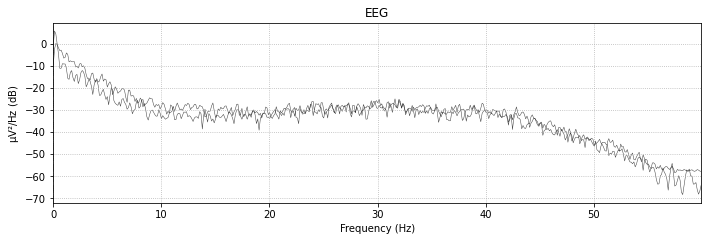

In [ ]:
raw.plot_psd(fmax=60)

In [ ]:
mon = mne.channels.read_custom_montage("/content/gdf_data/mBrain_24ch_locations.txt",)
raw.set_montage(mon,)

<ipython-input-296-adc447e7777e>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(mon,)


<RawArray | 3 x 15001 (60.0 s), ~363 kB, data loaded>

Fitting ICA to data using 2 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.0s.
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-297-4c623be74786>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


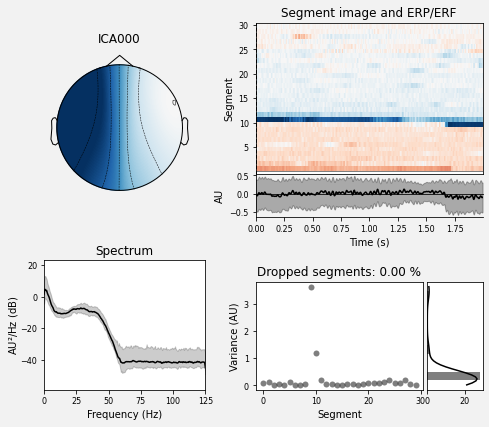

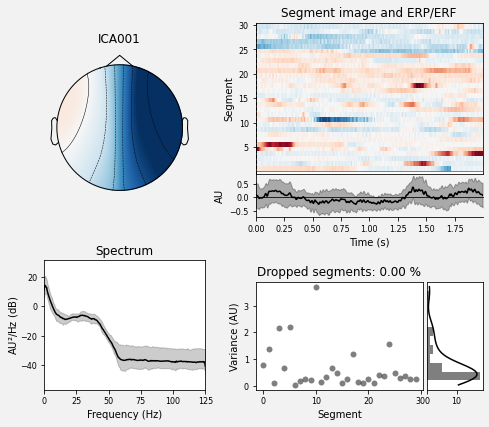

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [ ]:
ica = mne.preprocessing.ICA(n_components=2, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [0, 1]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [ ]:
events = mne.find_events(raw, stim_channel='stim')
print(events[:5])  # show the first 5

88 events found
Event IDs: [1]
[[ 51   0   1]
 [233   0   1]
 [423   0   1]
 [498   0   1]
 [651   0   1]]


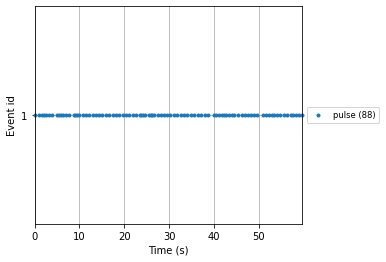

In [ ]:
event_dict = {'pulse': 1, }
fig = mne.viz.plot_events(events,
                          event_id=event_dict,
                          sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

In [ ]:
reject_criteria = dict(eeg=30e-7,)      # 150 µV -> 150e-6
epochs = mne.Epochs(raw=raw, 
                    events=events, 
                    event_id=event_dict, 
                    tmin=-0.2, tmax=50.,
                    reject=reject_criteria, 
                    preload=True)

Not setting metadata
88 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 88 events and 12551 original time points ...
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP2']
    Rejecting  epoch based on EEG : ['FP1', 'FP

    Using multitaper spectrum estimation with 7 DPSS windows


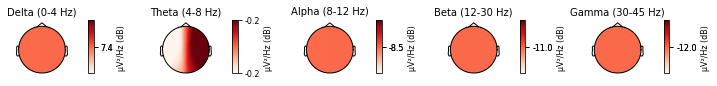

In [ ]:
with mne.use_log_level('WARNING'):  # hide some irrelevant info messages
    events = mne.find_events(raw, 
                             stim_channel='stim')
    epochs = mne.Epochs(raw, 
                        events, 
                        tmin=-0.3, 
                        tmax=0.7, 
                        event_id=event_dict,
                        preload=True)
epo_spectrum = epochs.plot_psd_topomap()
# psds, freqs = epo_spectrum.get_data(return_freqs=True)
# print(f'\nPSDs shape: {psds.shape}, freqs shape: {freqs.shape}')

    Using multitaper spectrum estimation with 7 DPSS windows


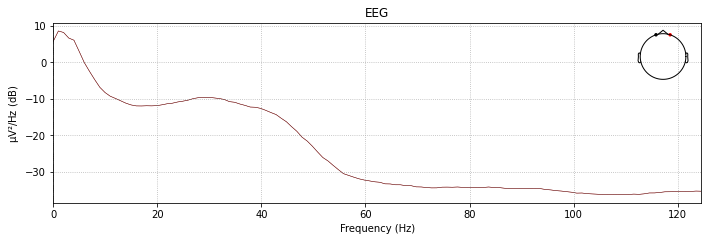

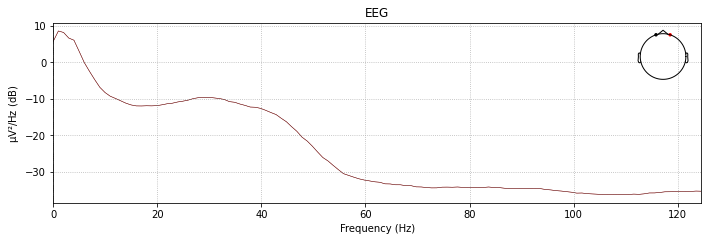

In [ ]:
epochs.plot_psd()

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


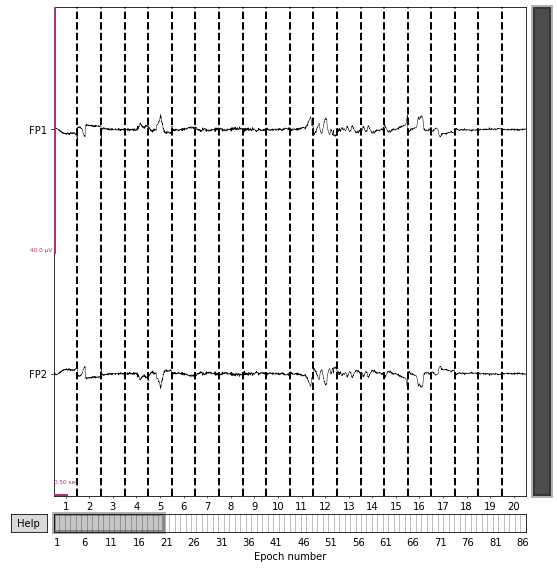

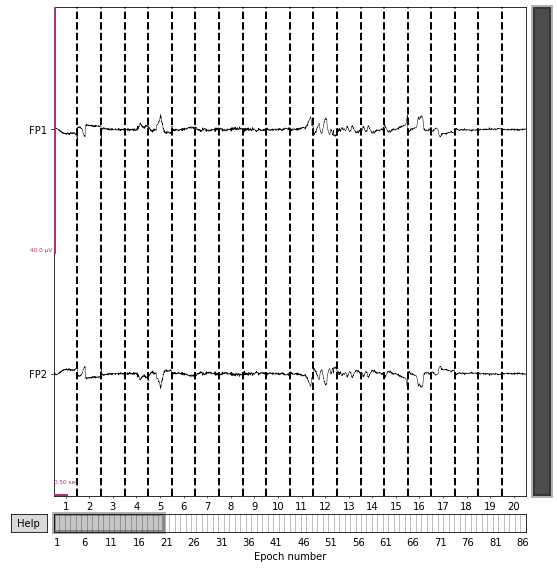

In [ ]:
epochs.plot(picks='eeg')

In [ ]:
conds_we_care_about = ['pulse', ]
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
pulse_epochs = epochs['pulse']

Dropped 0 epochs: 


Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated


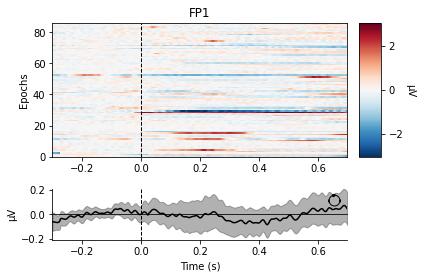

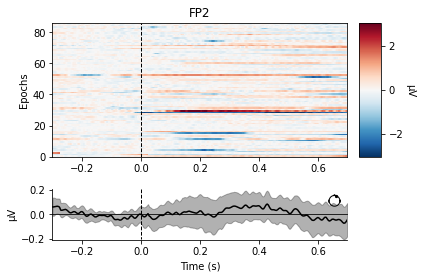

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [ ]:
pulse_epochs.plot_image(picks=['FP1', 'FP2'])

No baseline correction applied


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


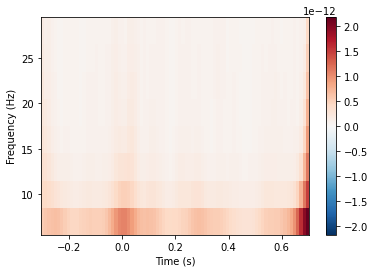

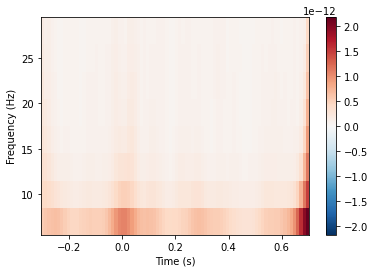

[<Figure size 432x288 with 2 Axes>, <Figure size 432x288 with 2 Axes>]

In [ ]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(pulse_epochs, 
                                      n_cycles=2, 
                                      return_itc=False,
                                      freqs=frequencies, 
                                      decim=3)
power.plot(['FP1', 'FP2'])

No baseline correction applied
No baseline correction applied


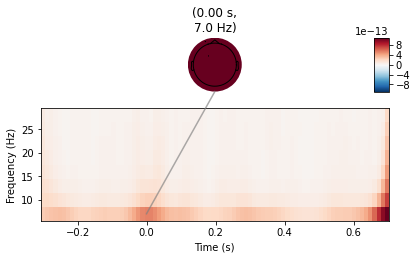

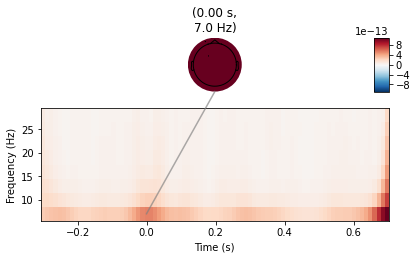

In [ ]:
power.plot_joint()

    Using multitaper spectrum estimation with 7 DPSS windows


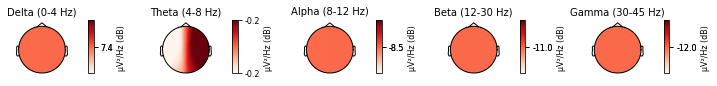

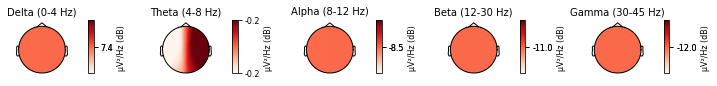

In [ ]:
pulse_epochs.plot_psd_topomap()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.baseline import rescale
from mne.datasets import somato
from mne.stats import bootstrap_confidence_interval

import copy

iter_freqs = [
    ('Delta', 0, 4),
    ('Theta', 4, 8),
    ('Alpha', 8, 12),
    ('Beta', 12, 30),
    ('Gamma', 30, 50)
]
event_id, tmin, tmax = 1, -1., 5.
baseline = None

frequency_map = list()
for band, fmin, fmax in iter_freqs:
    temp_raw = copy.deepcopy(raw)
    temp_raw.filter(l_freq=fmin,
               h_freq=fmax,
               picks=["eeg"],
               l_trans_bandwidth=1,
               h_trans_bandwidth=1)
    _epochs = mne.Epochs(temp_raw, 
                         events, 
                         tmin=tmin, 
                         tmax=tmax, 
                         event_id=event_dict,
                         preload=True)
    _epochs.subtract_evoked()
    _epochs.apply_hilbert(envelope=True)
    frequency_map.append(((band,fmin, fmax), _epochs.average()))


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 4.50 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
88 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 88 events and 1501 original time points ...
9 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: stim
[done]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
De

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


9 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: stim
[done]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
88 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 88 events and 1501 original time points ...
9 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


9 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: stim
[done]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 29.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 50.50 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
88 matching events found
Setting baseline interval to [-1.0, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 88 events and 1501 original time points ...
9 bad epochs dropp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


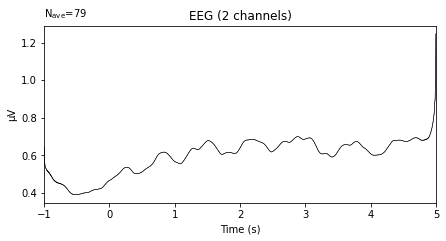

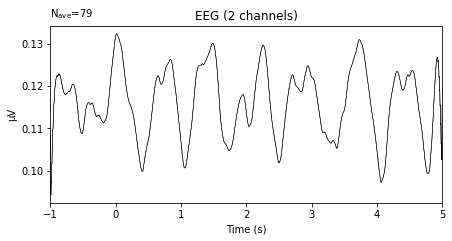

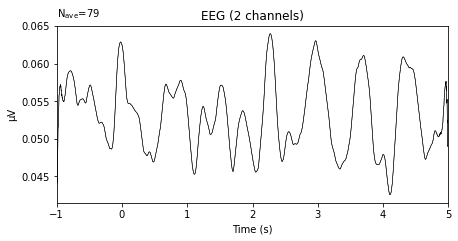

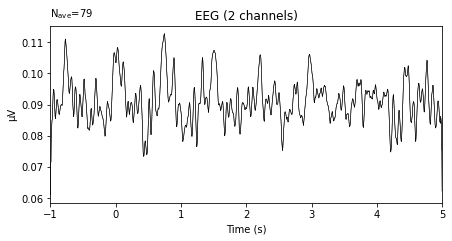

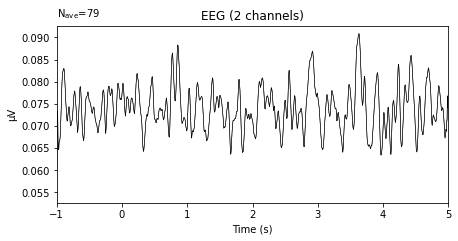

In [ ]:
for evo in frequency_map:
    evo[1].plot()

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


[]

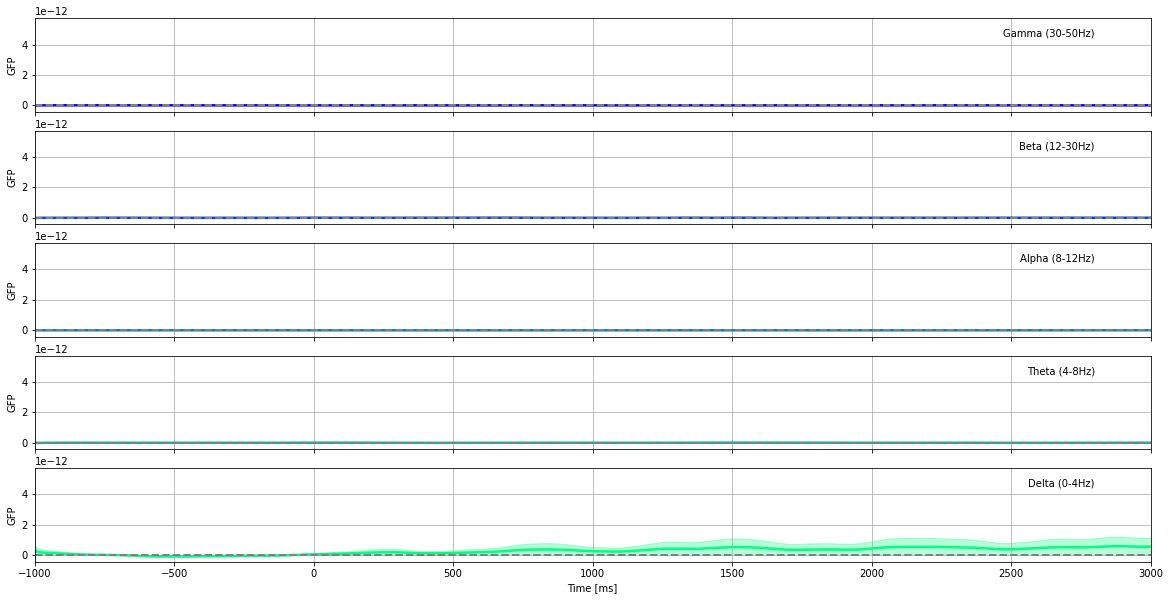

In [ ]:
import matplotlib as mpl
%matplotlib inline

def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x ** 2, axis=0)

# Plot
num_of_freq = len(frequency_map)
fig, axes = plt.subplots(num_of_freq, 1, figsize=(20, 10), sharex=True, sharey=True)
colors = mpl.cm.get_cmap('winter_r')(np.linspace(0, 1, num_of_freq))
for ((freq_name, fmin, fmax), average), color, ax in zip(frequency_map, colors, axes.ravel()[::-1]):
    times = average.times * 1e3
    gfp = np.sum(average.data ** 2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle='--', color='grey', linewidth=2)
    ci_low, ci_up = bootstrap_confidence_interval(average.data,
                                                  random_state=0,
                                                  stat_fun=stat_fun)
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel('GFP')
    ax.annotate('%s (%d-%dHz)' % (freq_name, fmin, fmax),
                xy=(0.95, 0.8),
                horizontalalignment='right',
                xycoords='axes fraction')
    ax.set_xlim(-1000, 3000)

axes.ravel()[-1].set_xlabel('Time [ms]')

plt.plot()

combining channels using "gfp"


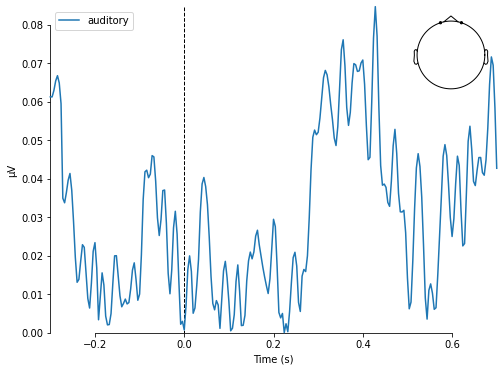

[<Figure size 576x432 with 2 Axes>]

In [ ]:
pulse_evoked = pulse_epochs.average()
mne.viz.plot_compare_evokeds(dict(auditory=pulse_evoked,),
                             legend='upper left', 
                             show_sensors='upper right')

Projections have already been applied. Setting proj attribute to True.


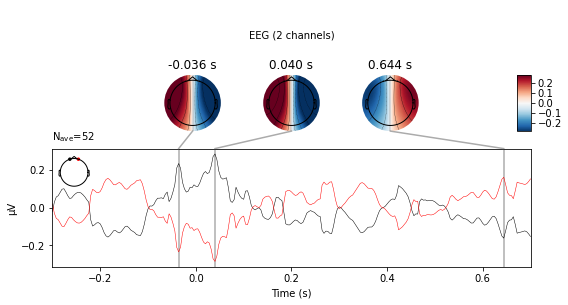

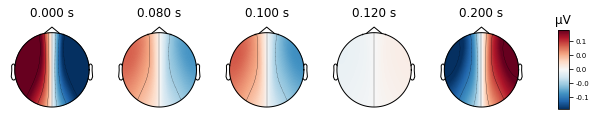

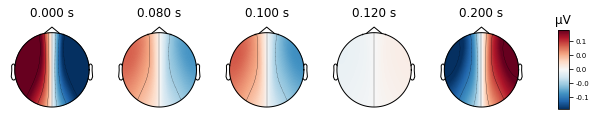

In [ ]:
pulse_evoked.plot_joint(picks='eeg')
pulse_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2],
                          ch_type='eeg')

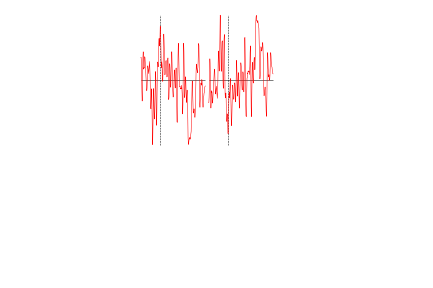

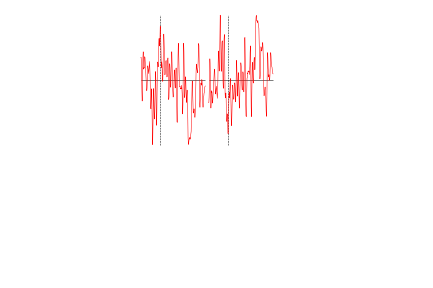

In [ ]:
evoked_diff = mne.combine_evoked([pulse_evoked,],
                                 weights=[1,])
evoked_diff.pick_types(eeg=True).plot_topo(color='r',
                                           legend=False)

In [ ]:
pulse_evoked.info

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FP2
 chs: 2 EEG
 custom_ref_applied: False
 dig: 2 items (2 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 2
 projs: Average EEG reference: on
 sfreq: 250.0 Hz
>

In [ ]:
noise_cov = mne.compute_covariance(
    pulse_epochs, 
    tmax=0., 
    method=['shrunk', 'empirical'], 
    rank=None, 
    verbose=True)

Computing rank from data with rank=None
    Using tolerance 4.9e-15 (2.2e-16 eps * 2 dim * 11  max singular value)
    Estimated rank (eeg): 1
    EEG: rank 1 computed from 2 data channels with 1 projector
    Created an SSP operator (subspace dimension = 1)
    Setting small EEG eigenvalues to zero (without PCA)
Reducing data rank from 2 -> 1
Estimating covariance using SHRUNK
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
Number of samples used : 7220
log-likelihood on unseen data (descending order):
   shrunk: 0.597
   empirical: 0.597
selecting best estimator: shrunk
[done]


In [ ]:
from mne.datasets import fetch_fsaverage
from mne.datasets import sample
import os
# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = os.path.dirname(fs_dir)

# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = os.path.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = os.path.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')

Using default location ~/mne_data for montage coregistration...
179 files missing from root.txt in /root/mne_data/MNE-fsaverage-data


Extracting missing files
Successfully extracted 179 files
10 files missing from bem.txt in /root/mne_data/MNE-fsaverage-data/fsaverage


Extracting missing files
Successfully extracted 10 files


In [ ]:
fwd = mne.make_forward_solution(
    info=pulse_evoked.info,
    trans=trans,
    src=src,
    bem=bem)

Source space          : /root/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif
MRI -> head transform : /usr/local/lib/python3.7/dist-packages/mne/data/fsaverage/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : /root/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /root/mne_data/MNE-fsaverage-data/fsaverage/bem/fsaverage-ico-5-src.fif...
Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read   2 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Setting up the BEM model using /root/mne_data/MNE-fsaverage

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found     0/ 7809 points outside using solid angles
    Total 10242/10242 points inside the surface
Interior check completed in 6130.9 ms
Checking surface interior status for 10242 points...
    Found  2241/10242 points inside  an interior sphere of radius   47.7 mm
    Found     0/10242 points outside an exterior sphere of radius   98.3 mm
    Found     0/ 8001 points outside using surface Qhull


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


    Found     0/ 8001 points outside using solid angles
    Total 10242/10242 points inside the surface
Interior check completed in 5307.2 ms

Setting up for EEG...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s finished


Computing EEG at 20484 source locations (free orientations)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Finished.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s finished


In [ ]:
# make inverse operator
inv_operator = mne.minimum_norm.make_inverse_operator(pulse_evoked.info,
                                                      fwd,
                                                      noise_cov,
                                                      loose=.2,
                                                      depth=.8)
# set signal-to-noise ratio (SNR) to compute regularization parameter (λ²)
snr = 3.
lambda2 = 1. / snr ** 2
# generate the source time course (STC)
stc = mne.minimum_norm.apply_inverse(evoked=pulse_evoked, 
                                     inverse_operator=inv_operator,
                                     lambda2=lambda2,
                                     method='dSPM')  

Converting forward solution to surface orientation
    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 2 channels.
    2 out of 2 channels remain after picking
Selected 2 channels
Creating the depth weighting matrix...
    2 EEG channels
    limit = 20485/20484 = 6.336269
    scale = 2264.15 exp = 0.8
Applying loose dipole orientations to surface source spaces: 0.2
Whitening the forward solution.
    Created an SSP operator (subspace dimension = 1)
Computing rank from covariance with rank=None
    Using tolerance 6.4e-20 (2.2e-16 eps * 2 dim * 0.00014  max singular value)
    Estimated rank (eeg): 1
    EEG: rank 1 computed from 2 data channels with 1 projector
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whit

In [ ]:
# plot the STC
# colab은 3D backend 지원을 안해서 안된다고 함
# 다른 방법을 통해서 시도 중

# !/sbin/start-stop-daemon --start --quiet --background --exec /usr/bin/Xvfb -- :99 -screen 0 800x600x24 -ac +extension GLX +render -noreset
# import os
# from ipycanvas import Canvas

# os.environ['DISPLAY'] = ':99'

# stc.plot(initial_time=0.1,
#          hemi='split',
#          views=['lat', 'med'],
#          subjects_dir=subjects_dir,
#          size=600,
#          background="white",
#          surface="white")


Using notebook 3d backend.

Using control points [2.67946486 2.70565315 2.90288162]


# Description of Data
---

Thirty six chronic neuropathic pain patients (8 men and 28 women) of Mexican nationality with a mean age of 44±13.98 were recruited for EEG signal recording in eyes open and eyes closed condition. Each condition was recorded for 5 min, with a total recording session time of 10 min. An ID number was given to each patient after singing up for the study, with which they answered the Pain Detect questionnaire. All patients had: (1) age above 18 years old, (2) chronic NP for more than 3 months, (3) long-term pharmacological treatment for at least 4 weeks prior to the EEG recording, (4) absence of a major psychiatric disorder (i.e., schizophrenia, major depressive disorder, bipolar disorder), (5) absence of a neurological disorder (i.e., epilepsy, tinnitus), and (6) Total Score >12 points of Pain Detect Questionnaire (the questionnaire outcome was confirmed by the clinical history of the patient). Patients were allowed to continue with their medication. The type and frequency of the pharmacological treatment was the following. Eighteen patients (n=18) were taking centrally acting drugs for over a year, twelve patients (n=12) were not taking medication, two patients (n=2) were on cannabidiol derivatives, and three (n=3) took nonsteroidal anti-inflammatory drugs for pain attacks. The causes for NP in the studied sample were spinal cord injury (31%), peripheral neuropathy (23%), diabetes (17%), trigeminal neuralgia (9%), CNS disorder (6%), and other (14%). None of these patients had any type of acute or chronic pain other than NP (e.g., arthritis, migraine, fibromyalgia), a severe mental disorder, neurological disorder (beside NP), head trauma, cerebral infarct, or CNS tumor.

This study was approved by the Ethics Committee of CEIC TecSalud with the following number: P000369-DN-RespElectro-CI-CR005.


Description and objective: 
---
Chronic neuropathic pain is defined as “pain arising as a direct consequence of a lesion or disease affecting the somatosensory system" according to the International Association for the Study of Pain.  When neuropathic pain becomes chronic (has a duration greater than 3 months), the neurons in the spinal cord and the brain respond with neuroplastic changes. Currently, there is a significant gap in chronic neuropathic pain research and clinical management, because characterization relies only on the subjective perception of the patient. To address the characterization gap, the principal objective of this study was to characterize the neuroplastic changes in neuronal oscillations for the different degrees of neuropathic pain severity using linear and non linear dynamics. This could be a method to achieve an objective characterization and monitoring of neuropathic pain patients, and ultimately lead to a better management of their disease.
```
EC : Eyes closed condition
EO : Eyes open condition
```

In [ ]:
# 다운로드 받은 예제 EEG
t = mne.io.read_raw_gdf(input_fname="/content/gdf_data/ID0.gdf")
t

Extracting EDF parameters from /content/gdf_data/ID0.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, P8, Fz, Cz, Pz, M1, M2, AFz, CPz, POz
Creating raw.info structure...


<RawGDF | ID0.gdf, 24 x 149952 (599.8 s), ~28 kB, data not loaded>

24 * 149952 개


In [ ]:
test = t.to_data_frame()
test.describe()

time            FP1            FP2             F3  \
count  149952.000000  149952.000000  149952.000000  149952.000000   
mean      299.902000   16134.136751   -1586.329000  -12482.508984   
std       173.150232     485.486673     280.408363     435.633080   
min         0.000000   13985.285919   -2601.840193  -14288.331959   
25%       149.951000   16000.052863   -1673.752733  -12598.771430   
50%       299.902000   16137.358611   -1586.630543  -12489.442311   
75%       449.853000   16261.598289   -1506.553267  -12348.832676   
max       599.804000   18036.430868    -338.378288  -10551.114169   

                  F4             C3             C4             P3  \
count  149952.000000  149952.000000  149952.000000  149952.000000   
mean   -17143.348970   17855.605331   -9503.617166  -29271.513693   
std        46.654519     696.311698     359.696200     139.065172   
min    -17305.702436   14822.007679  -10938.911692  -29890.742122   
25%    -17168.422398   17669.748350   -9590.814826  -29322.717257   
50%    -17147.787419   17871.195937   -9503.512218  -29265.449421   
75%    -17107.831476   18074.042564   -9399.980921  -29214.340810   
max    -17015.311726   20781.199726   -7949.195053  -28666.971536   

                  P4             O1  ...             P7             P8  \
count  149952.000000  149952.000000  ...  149952.000000  149952.000000   
mean   -13617.635908  -23068.628287  ...  -16503.045538  -11146.369283   
std       554.488741     537.088343  ...     135.551379     139.141907   
min    -15889.814676  -25153.867857  ...  -16779.854564  -11653.062121   
25%    -13792.525943  -23233.211297  ...  -16610.718371  -11184.976526   
50%    -13604.535144  -23081.198946  ...  -16511.819438  -11147.393981   
75%    -13430.604748  -22862.731083  ...  -16413.263878  -11107.613803   
max    -11226.659524  -20750.142894  ...  -15978.655644  -10515.771012   

                  Fz             Cz             Pz             M1  \
count  149952.000000  149952.000000  149952.000000  149952.000000   
mean    -8247.269561  -16980.435859  -28754.130575  -15089.428546   
std       520.512097      56.188804     305.780922     281.408374   
min    -10331.466763  -17242.561055  -30097.586717  -16063.725098   
25%     -8388.729043  -17012.439165  -28862.419630  -15175.876319   
50%     -8254.477938  -16981.550319  -28745.435759  -15087.496943   
75%     -8077.589847  -16942.908259  -28636.057094  -14986.819197   
max     -6011.629380  -16804.187319  -27466.308895  -13835.338029   

                  M2            AFz            CPz            POz  
count  149952.000000  149952.000000  149952.000000  149952.000000  
mean   -10799.581223  -13536.034137  -16060.282245  -12613.360427  
std       159.895645      64.525499     746.455416     634.720680  
min    -11343.382173  -13735.170619  -19133.215307  -15197.002233  
25%    -10871.215722  -13577.447961  -16257.567412  -12801.578843  
50%    -10802.013741  -13537.100603  -16065.740089  -12605.219717  
75%    -10739.094046  -13504.235842  -15816.586540  -12418.061186  
max    -10087.544792  -13229.007868  -12850.239020   -9818.910006  

[8 rows x 25 columns]

In [ ]:
test

time           FP1          FP2            F3            F4  \
0         0.000  17698.496588 -2485.430485 -13970.660683 -17133.346089   
1         0.004  17664.706954 -2466.361117 -13938.081735 -17137.680575   
2         0.008  17700.297361 -2487.230405 -13968.895381 -17133.842603   
3         0.012  17716.657544 -2496.296132 -13983.205455 -17130.038623   
4         0.016  17687.677739 -2481.100504 -13951.489418 -17132.945350   
...         ...           ...          ...           ...           ...   
149947  599.788  14188.297255  -457.851928 -10745.876574 -17100.210207   
149948  599.792  14194.150375  -461.410126 -10755.278744 -17098.752905   
149949  599.796  14206.195594  -463.693459 -10769.928655 -17095.978444   
149950  599.800  14207.984670  -464.010947 -10768.554166 -17094.588846   
149951  599.804  14215.266031  -469.262985 -10772.613020 -17093.774526   

                  C3            C4            P3            P4            O1  \
0       15366.692757 -10670.449725 -29762.227626 -15439.754220 -24700.695912   
1       15418.555351 -10646.670127 -29750.638859 -15401.471148 -24661.236257   
2       15370.088309 -10670.785637 -29759.541054 -15439.488530 -24694.923499   
3       15339.563823 -10685.169520 -29767.980015 -15461.469562 -24721.265886   
4       15381.515843 -10663.904162 -29759.637544 -15429.236456 -24692.574889   
...              ...           ...           ...           ...           ...   
149947  20471.653599  -8096.797572 -28748.104711 -11472.798029 -21011.774134   
149948  20462.922440  -8100.843303 -28750.078662 -11478.523402 -21011.868325   
149949  20443.381487  -8109.629238 -28756.684445 -11491.079393 -21028.420969   
149950  20437.573254  -8110.782638 -28762.704299 -11494.669559 -21045.687703   
149951  20426.430804  -8114.362087 -28765.435739 -11500.836368 -21056.107656   

        ...            P7            P8           Fz            Cz  \
0       ... -16019.863182 -11524.896308 -9942.730215 -17058.417791   
1       ... -16019.101413 -11515.038177 -9907.234290 -17051.707448   
2       ... -16012.118210 -11521.532302 -9940.784730 -17056.905258   
3       ... -16015.279521 -11526.831332 -9958.676882 -17063.009722   
4       ... -16020.589338 -11522.688745 -9928.691263 -17057.208223   
...     ...           ...           ...          ...           ...   
149947  ... -16753.456827 -10573.419428 -6227.320275 -16864.680052   
149948  ... -16750.514764 -10573.092461 -6233.368705 -16866.331272   
149949  ... -16751.398610 -10574.467516 -6244.618925 -16870.025382   
149950  ... -16761.518155 -10579.083673 -6244.263900 -16870.509735   
149951  ... -16765.141890 -10579.448628 -6250.895636 -16870.395000   

                  Pz            M1            M2           AFz           CPz  \
0      -29820.818290 -15804.170242 -10865.971843 -13423.142049 -18535.676094   
1      -29800.290626 -15777.886478 -10855.344769 -13428.325739 -18482.857296   
2      -29821.451100 -15805.029459 -10867.363899 -13424.469288 -18536.325339   
3      -29834.068634 -15822.699527 -10875.642056 -13419.509618 -18568.329740   
4      -29816.270827 -15801.639853 -10870.107925 -13419.477787 -18523.369902   
...              ...           ...           ...           ...           ...   
149947 -27611.808740 -13972.998818 -10138.031573 -13692.505519 -13184.985729   
149948 -27614.672091 -13975.917514 -10137.356976 -13695.558498 -13193.434053   
149949 -27622.265777 -13990.913552 -10144.796072 -13696.552243 -13213.369794   
149950 -27625.560767 -13993.076516 -10149.379591 -13690.334004 -13215.952805   
149951 -27629.834520 -13997.089399 -10154.826902 -13687.184662 -13224.041193   

                 POz  
0      -14680.425682  
1      -14635.347824  
2      -14679.011409  
3      -14706.100684  
4      -14667.725605  
...              ...  
149947 -10114.397387  
149948 -10122.947809  
149949 -10140.171296  
149950 -10148.029042  
149951 -10156.593460  

[149952 rows x 25 columns]

In [ ]:
import pandas as pd
read_eeg = pd.read_excel("/content/2ch_EEG.xlsx")
read_eeg["time"] = read_eeg.index
read_eeg["time"] = read_eeg["time"]*4/1000
read_eeg.describe()

EEG1           EEG2            PPG          sdPPG  \
count  141808.000000  141808.000000  141808.000000  141808.000000   
mean        7.774581       5.846089   15845.130331   16394.750049   
std        49.956057      61.425680    6937.504671    3353.086250   
min      -590.840000    -590.840000       1.000000       0.000000   
25%        -8.763000      -8.871000   11447.000000   14853.000000   
50%         6.996000       5.554000   16239.000000   16379.000000   
75%        22.899000      20.411000   18988.000000   17768.000000   
max       590.804000     590.804000   32768.000000   32767.000000   

               pulse  peak_interval(msec)           time  
count  141808.000000        141808.000000  141808.000000  
mean        0.005522           646.527953     283.614000  
std         0.074102          1423.151887     163.746351  
min         0.000000             0.000000       0.000000  
25%         0.000000           364.000000     141.807000  
50%         0.000000           580.000000     283.614000  
75%         0.000000           652.000000     425.421000  
max         1.000000         38120.000000     567.228000

Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


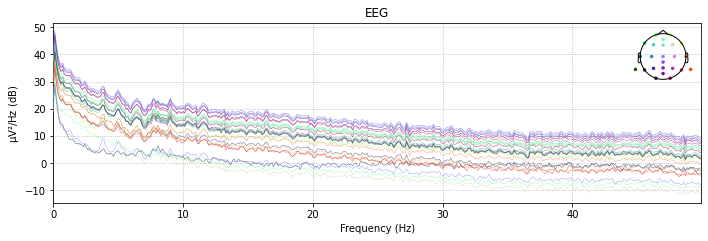

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


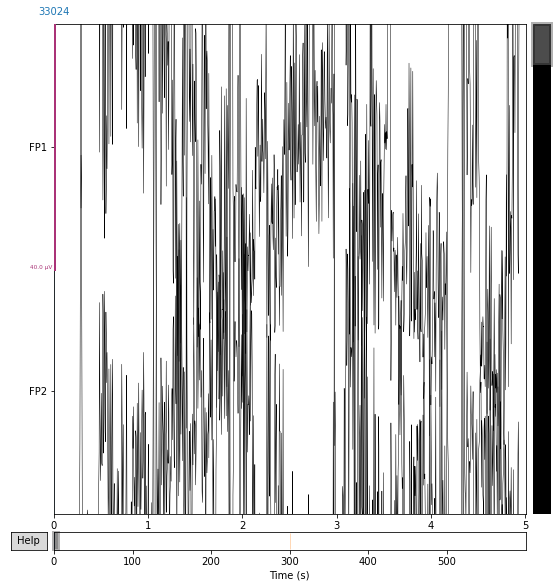

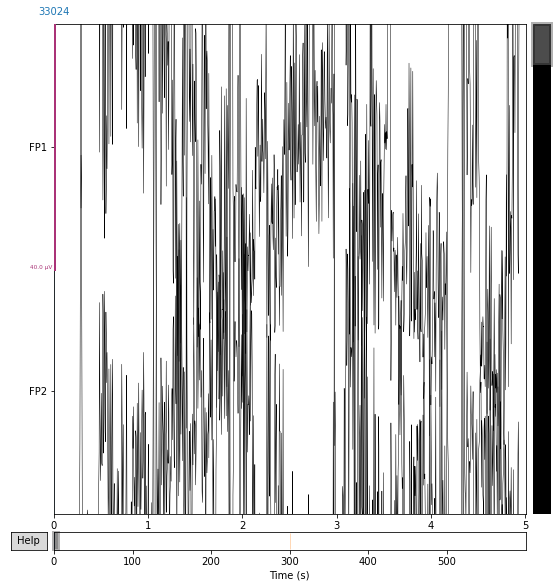

In [ ]:
t.plot_psd(fmax=50)
t.plot(duration=5, n_channels=2)

In [ ]:
t.ch_names[:2]

['FP1', 'FP2']

In [ ]:
from mne.channels.montage import get_builtin_montages

In [ ]:
mon = mne.channels.make_standard_montage(kind="standard_1020")

In [ ]:
mon = mne.channels.read_custom_montage("/content/gdf_data/mBrain_24ch_locations.txt",)
# mon = mne.channels.read_custom_montage("/content/gdf_data/mBrain 22ch- Referenced channels.txt",)

In [ ]:
t.set_montage(mon,)

<ipython-input-36-0945678e13cc>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  t.set_montage(mon,)


<RawGDF | ID0.gdf, 24 x 149952 (599.8 s), ~27.5 MB, data loaded>

In [ ]:
t.get_montage().dig

[<DigPoint |     EEG #1 : (-29.4, 90.4, 0.0) mm     : head frame>,
 <DigPoint |     EEG #2 : (29.4, 90.4, 0.0) mm      : head frame>,
 <DigPoint |     EEG #3 : (-51.8, 63.9, 47.5) mm    : head frame>,
 <DigPoint |     EEG #4 : (51.8, 63.9, 47.5) mm     : head frame>,
 <DigPoint |     EEG #5 : (-67.2, 0.0, 67.2) mm     : head frame>,
 <DigPoint |     EEG #6 : (67.2, 0.0, 67.2) mm      : head frame>,
 <DigPoint |     EEG #7 : (-51.8, -63.9, 47.5) mm   : head frame>,
 <DigPoint |     EEG #8 : (51.8, -63.9, 47.5) mm    : head frame>,
 <DigPoint |     EEG #9 : (-29.4, -90.4, 0.0) mm    : head frame>,
 <DigPoint |    EEG #10 : (29.4, -90.4, 0.0) mm     : head frame>,
 <DigPoint |    EEG #11 : (-76.9, 55.8, 0.0) mm     : head frame>,
 <DigPoint |    EEG #12 : (76.9, 55.8, 0.0) mm      : head frame>,
 <DigPoint |    EEG #13 : (-95.0, 0.0, 0.0) mm      : head frame>,
 <DigPoint |    EEG #14 : (95.0, 0.0, 0.0) mm       : head frame>,
 <DigPoint |    EEG #15 : (-76.9, -55.8, 0.0) mm    : head fra

In [ ]:
ica = mne.preprocessing.ICA(n_components=2, random_state=97, max_iter=800)
ica.fit(t)

Fitting ICA to data using 24 channels (please be patient, this may take a while)


<ipython-input-38-209fd3ec7a26>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(t)


Selecting by number: 2 components
Fitting ICA took 1.6s.


<ICA | raw data decomposition, method: fastica (fit in 74 iterations on 149952 samples), 2 ICA components explaining 96.9 % of variance (24 PCA components available), channel types: eeg, no sources marked for exclusion>

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
299 matching events found
No baseline correction applied
0 projection items activated


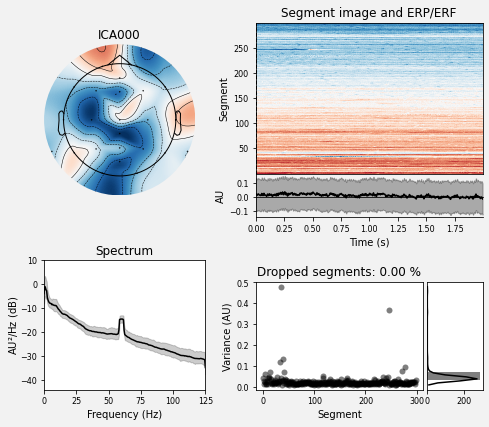

[<Figure size 504x432 with 6 Axes>]

In [ ]:
ica.exclude = [0]
ica.plot_properties(inst=t,picks=ica.exclude,)

Fitting ICA to data using 24 channels (please be patient, this may take a while)


<ipython-input-41-c201f4510ef7>:8: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(t)


Selecting by number: 2 components
Fitting ICA took 0.5s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
299 matching events found
No baseline correction applied
0 projection items activated


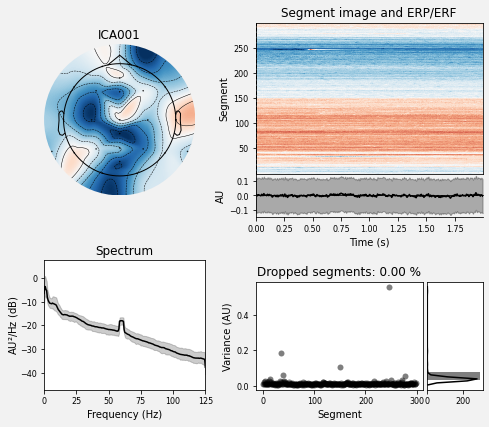

Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroing out 1 ICA component
    Projecting back using 24 PCA components


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


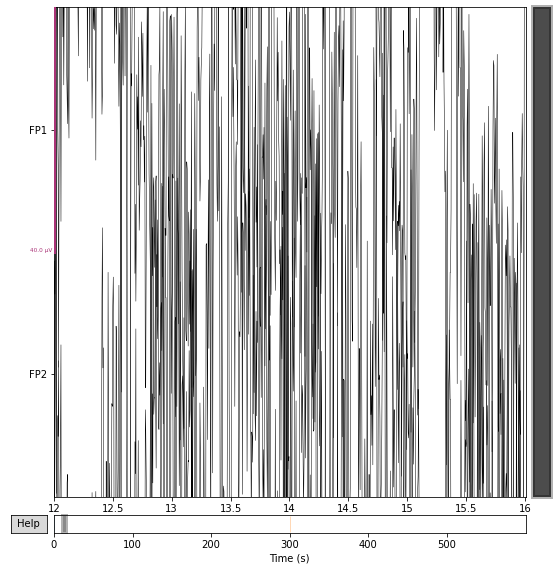

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


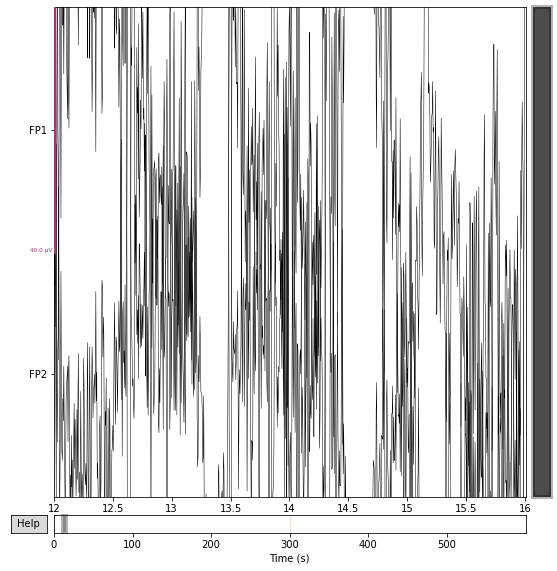

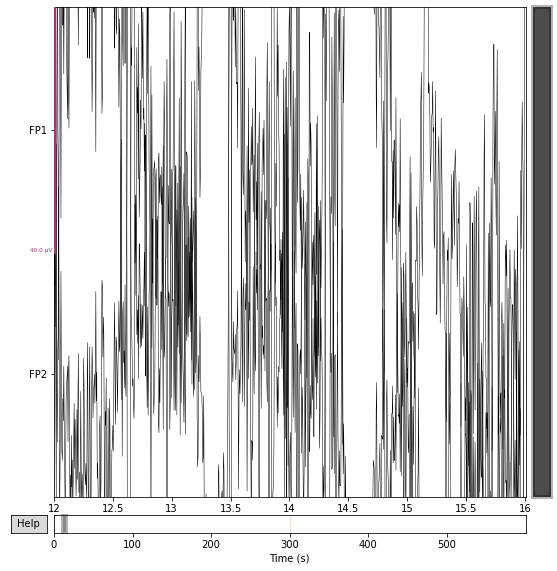

In [ ]:
chs = ["FP1","FP2",]
#  "F3","F4","C3","C4","P3","P4","O1","O2", 
    #    "F7","F8","T7","T8","P7","P8","Fz","Cz","Pz","M1"]
chan_idx = [t.ch_names.index(ch) for ch in chs]
orig_raw = t.copy()
t.load_data()
ica = mne.preprocessing.ICA(n_components=2, random_state=97, max_iter=800)
ica.fit(t)
ica.exclude = [1]  # details on how we picked these are omitted here
ica.plot_properties(t, picks=ica.exclude)
ica.apply(t)
orig_raw.plot(order=chan_idx, start=12, duration=4)
t.plot(order=chan_idx, start=12, duration=4)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


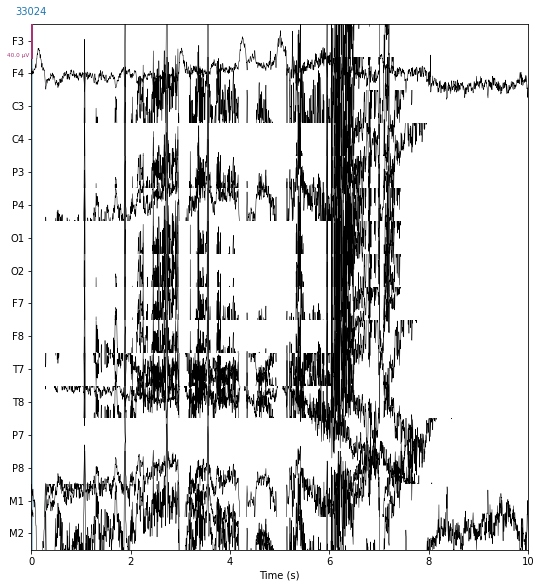

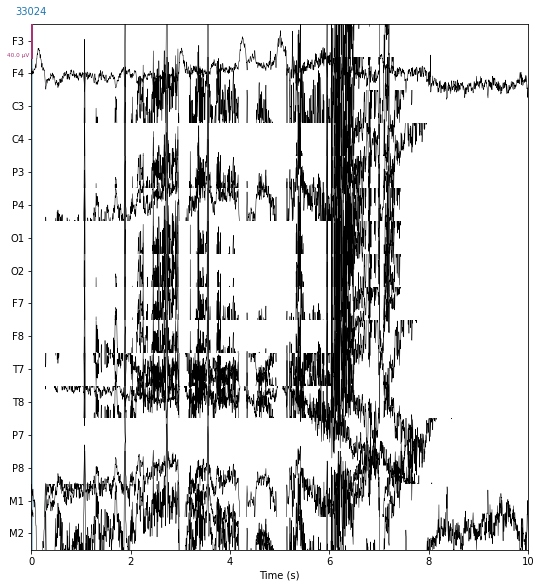

In [ ]:
regexp = r"(^[a-zA-Z+][0-9+])"
pick = mne.pick_channels_regexp(t.ch_names, regexp = regexp)
t.plot(order = pick, n_channels=len(pick), show_scrollbars = False)

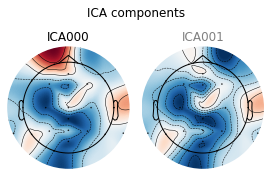

[<MNEFigure size 280.8x187.56 with 2 Axes>]

In [ ]:
ca.plot_components()

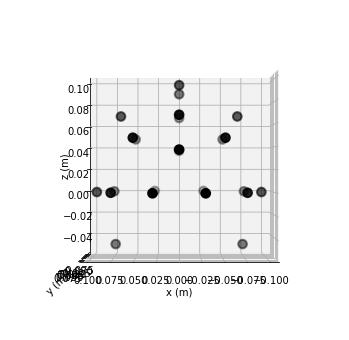

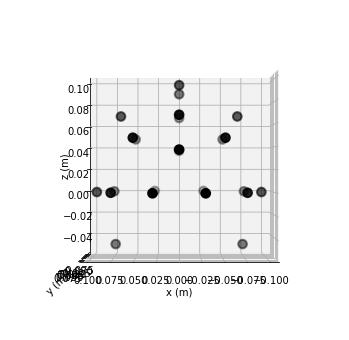

In [ ]:
t.plot_sensors('3d')

Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroing out 1 ICA component
    Projecting back using 24 PCA components


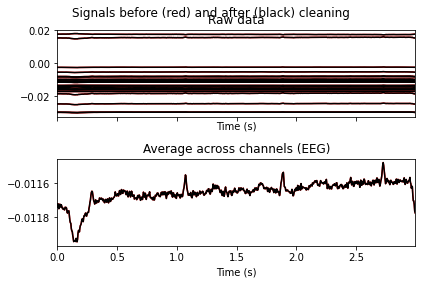

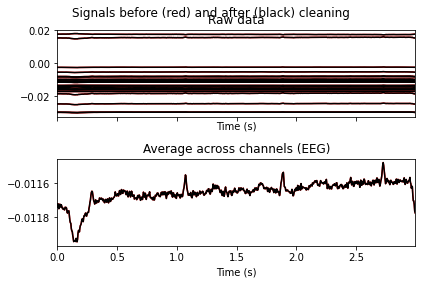

In [ ]:
ica.plot_overlay(t,exclude=ica.exclude,picks='eeg')

In [ ]:
import pydicom as dcm
import nibabel as nib
import os
proxy = nib.load("/content/someones_epi.nii.gz")

Examples

In [ ]:
import os
import seaborn as sns
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 178GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json


In [ ]:
sample_data_events_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                       'sample_audvis_filt-0-40_raw-eve.fif')
events = mne.read_events(sample_data_events_file)

event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4}

reject_criteria = dict(mag=3000e-15,     # 3000 fT
                       grad=3000e-13,    # 3000 fT/cm
                       eeg=100e-6,       # 100 µV
                       eog=200e-6)       # 200 µV

tmin, tmax = (-0.2, 0.5)  # epoch from 200 ms before event to 500 ms after it
baseline = (None, 0)      # baseline period from start of epoch to time=0

epochs = mne.Epochs(raw, events, event_dict, tmin, tmax, proj=True,
                    baseline=baseline, reject=reject_criteria, preload=True)
del raw

Not setting metadata
Not setting metadata
288 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 288 events and 106 original time points ...
    Rejecting  epoch based on EEG : ['EEG 003']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 006', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 001']
    Rejecting  epoch based on EEG : ['EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EEG : ['EEG 003', 'EEG 007']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on MAG : ['MEG 1411', 'MEG 1421', 'MEG 1441']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG

In [ ]:
df = epochs.to_data_frame(time_format=None,
                          scalings=dict(eeg=1, mag=1, grad=1))
df.iloc[:5, :10]

time    condition  epoch  ...      MEG 0123      MEG 0121      MEG 0132
0 -0.199795  visual/left      1  ... -1.870054e-12 -6.835275e-14 -1.790867e-12
1 -0.193135  visual/left      1  ... -4.018224e-12 -1.212257e-13  2.072452e-13
2 -0.186476  visual/left      1  ... -6.515720e-12 -1.178425e-13  6.986073e-13
3 -0.179816  visual/left      1  ... -6.521463e-12 -8.204314e-14  9.672744e-13
4 -0.173156  visual/left      1  ... -4.377831e-12 -1.117960e-13  1.727714e-12

[5 rows x 10 columns]

In [ ]:
df = epochs.to_data_frame(index=['condition', 'epoch'],
                          time_format='timedelta')
df.iloc[:5, :10]

time   MEG 0113  ...   MEG 0133    MEG 0131
condition   epoch                                         ...                       
visual/left 1     -1 days +23:59:59.800204787  21.320252  ...  45.379736  -53.123525
            1     -1 days +23:59:59.806864627   7.049675  ...  27.734826  -95.339465
            1     -1 days +23:59:59.813524468   5.283711  ...   5.996158 -177.627037
            1     -1 days +23:59:59.820184308  23.040471  ...   1.748030 -211.024973
            1     -1 days +23:59:59.826844149  25.688943  ...   2.123811 -173.917677

[5 rows x 10 columns]

In [ ]:
long_df = epochs.to_data_frame(time_format=None, index='condition',
                               long_format=True)
long_df.head()

Converting "epoch" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


epoch      time   channel ch_type      value
condition                                               
visual/left     1 -0.199795  MEG 0113    grad  21.320252
visual/left     1 -0.199795  MEG 0112    grad  11.567619
visual/left     1 -0.199795  MEG 0111     mag -73.248584
visual/left     1 -0.199795  MEG 0122    grad -10.609895
visual/left     1 -0.199795  MEG 0123    grad -18.700540

In [ ]:
channels = ['MEG 1332', 'MEG 1342']
data = long_df.loc['auditory/left'].query('channel in @channels')
# convert channel column (CategoryDtype → string; for a nicer-looking legend)
data['channel'] = data['channel'].astype(str)
sns.lineplot(x='time', y='value', hue='channel', data=data)

In [ ]:
df = epochs.to_data_frame(time_format=None)
peak_latency = (df.filter(regex=r'condition|epoch|MEG 1332|MEG 2123')
                .groupby(['condition', 'epoch'])
                .aggregate(lambda x: df['time'].iloc[x.idxmax()])
                .reset_index()
                .melt(id_vars=['condition', 'epoch'],
                      var_name='channel',
                      value_name='latency of peak')
                )

ax = sns.violinplot(x='channel', y='latency of peak', hue='condition',
                    data=peak_latency, palette='deep', saturation=1)